 # Module 2

# *Online Dermatologists:* 📱 🌐 Diagnosing Skin Cancer through a Web Application 

In this project, we will be be diagnosing skin lesion images for signs of skin cancer. To perform this task, we'll be working with an array of machine learning methods and models.

We're hoping that our model might be useful to people who don't have easy access to medical professionals. For that, it'll need to be both highly accurate and easily accessible! Yesterday's simple models didn't perform well enough for this job.

In this notebook we'll be:
*   Developing more complex ML models using Convolutional Neural Networks
*   Deploying our ML models to a web app

# Set up our Environment

In [ ]:
#@title Run this to download data and prepare our environment! { display-mode: "form" }
from google.colab.output import eval_js

import time
start_time = time.time()

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.notebook import tqdm

import keras
from keras import backend as K
from tensorflow.keras.layers import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import random
from PIL import Image
import gdown

import argparse
import numpy as np
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
import struct
from google.colab.patches import cv2_imshow
from copy import deepcopy
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from keras.applications.mobilenet import MobileNet

!pip install hypopt
from hypopt import GridSearch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

!pip install -U opencv-contrib-python
import cv2

!pip install tensorflowjs 
import tensorflowjs as tfjs

from google.colab import files

import requests, io, zipfile

# Prepare data

images_1 = os.makedirs('images_1', exist_ok=True)
images_2= os.makedirs('images_2', exist_ok=True)
images_all= os.makedirs('images_all', exist_ok=True)

metadata_path = 'metadata.csv'
image_path_1 = 'images_1.zip'
image_path_2 = 'images_2.zip'
images_rgb_path = 'hmnist_8_8_RGB.csv'

!wget -O metadata.csv 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/metadata.csv'
!wget -O images_1.zip 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/images_1.zip'
!wget -O images_2.zip 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/images_2.zip'
!wget -O hmnist_8_8_RGB.csv 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/hmnist_8_8_RGB.csv'
!unzip -q images_1.zip -d images_1 
!unzip -q images_2.zip -d images_2 

!pip install patool
import patoolib

import os.path
from os import path

from distutils.dir_util import copy_tree

fromDirectory = 'images_1'
toDirectory = 'images_all'

copy_tree(fromDirectory, toDirectory)

fromDirectory = 'images_2'
toDirectory = 'images_all'

copy_tree(fromDirectory, toDirectory)

os.makedirs("static/js")
!wget -O static/js/skin_cancer_diagnosis_script.js 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/skin_cancer_diagnosis_script.js'
output = 'static/js/skin_cancer_diagnosis_script.js'

print("Downloaded Data")

     |████████████████████████████████| 57.4MB 52kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


     |████████████████████████████████| 71kB 2.2MB/s 
     |████████████████████████████████| 112kB 3.9MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0
--2021-05-30 15:41:23--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/metadata.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553377 (540K) [text/csv]
Saving to: ‘metadata.csv’

metadata.csv        100%[===================>] 540.41K  --.-KB/s    in 0.006s  

2021-05-30 15:41:24 (93.9 MB/s) - ‘metadata.csv’ saved [553377/553377]

--2021-05-30 15:41:24--  https://storage.googleapis.com/inspirit-ai-

In [ ]:
#@title If the previous cell fails to run, run this cell instead! { display-mode: "form" }
from google.colab.output import eval_js

import time
start_time = time.time()

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.notebook import tqdm

import keras
from keras import backend as K
from tensorflow.keras.layers import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import random
from PIL import Image
import gdown

import argparse
import numpy as np
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
import struct
from google.colab.patches import cv2_imshow
from copy import deepcopy
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from keras.applications.mobilenet import MobileNet

!pip install hypopt
from hypopt import GridSearch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

!pip install -U opencv-contrib-python
import cv2

!pip install tensorflowjs 
import tensorflowjs as tfjs

from google.colab import files

import requests, io, zipfile

# Prepare data

DATA_ROOT = '/content/data'
os.makedirs(DATA_ROOT, exist_ok=True)

metadata_url = 'https://drive.google.com/uc?id=1kmpa-Lnra-8KhEjj8r3nj9y4e53qcPGX'
metadata_path = os.path.join(DATA_ROOT, 'metadata.csv')
requests.get(metadata_url)
gdown.download(metadata_url, metadata_path, True)

images_1 = 'https://drive.google.com/uc?id=1HW5HbQ_OR7xUPWfw4yg1r_EbhDaCuOrj'
image_path_1 = os.path.join(DATA_ROOT, 'images_1.zip')
requests.get(images_1)
gdown.download(images_1, image_path_1, True)

images_2 = 'https://drive.google.com/uc?id=1VAbEVMKZmKyh9tpe9iVZ_XpTPLpxitwt'
image_path_2 = os.path.join(DATA_ROOT, 'images_2.zip')
requests.get(images_2)
gdown.download(images_2, image_path_2, True)

metadata_path = os.path.join(DATA_ROOT, 'metadata.csv')
image_path_1 = os.path.join(DATA_ROOT, 'images_1.zip')
image_path_2 = os.path.join(DATA_ROOT, 'images_2.zip')
images_rgb_path = os.path.join(DATA_ROOT, 'hmnist_8_8_RGB.csv')

!pip install patool
import patoolib

import os.path
from os import path

if path.exists(os.path.join(DATA_ROOT, 'images_1')) == False:
  patoolib.extract_archive(os.path.join(DATA_ROOT, 'images_1.zip'), outdir= os.path.join(DATA_ROOT, 'images_1') )

if path.exists(os.path.join(DATA_ROOT, 'images_2')) == False:
  patoolib.extract_archive(os.path.join(DATA_ROOT, 'images_2.zip'), outdir= os.path.join(DATA_ROOT, 'images_2') )

from distutils.dir_util import copy_tree

fromDirectory = os.path.join(DATA_ROOT, 'images_1')
toDirectory = os.path.join(DATA_ROOT, 'images_all')

copy_tree(fromDirectory, toDirectory)

fromDirectory = os.path.join(DATA_ROOT, 'images_2')
toDirectory = os.path.join(DATA_ROOT, 'images_all')

copy_tree(fromDirectory, toDirectory)

import os
os.makedirs("static/js")

url = 'https://drive.google.com/uc?id=1Akfbi47i0Di9i-tNoIkgIWM-yvBWHvZr'
output = 'static/js/skin_cancer_diagnosis_script.js'
gdown.download(url, output, quiet=False)

print("Downloaded Data")

KeyboardInterrupt: ignored

In [ ]:
IMG_WIDTH = 100
IMG_HEIGHT = 75

In [ ]:
#@title Run this to initialize our X, X_g, and y variables { display-mode: "form" }
metadata = pd.read_csv(metadata_path)
metadata['category'] = metadata['dx'].replace({'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6,})

X = []
X_g = []

y = []

for i in tqdm(range(len(metadata))):
  image_meta = metadata.iloc[i]
  path = os.path.join(toDirectory, image_meta['image_id'] + '.jpg')
  img = cv2.imread(path,cv2.IMREAD_COLOR)
  img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))
  
  img_g = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  X_g.append(img_g)

  X.append(img)
  y.append(image_meta['category'])

X_g = np.array(X_g)
X = np.array(X)
y = np.array(y)

In [ ]:
sample_cap = 142
option = 1

In [ ]:
#@title Option 1: Run this to reduce dataset size. This method caps each class at *sample_cap* samples. { display-mode: "form" }
if (option == 1):
  objects = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
  class_totals = [0,0,0,0,0,0,0]
  iter_samples = [0,0,0,0,0,0,0]
  indicies = []

  for i in range(len(X)):
    class_totals[y[i]] += 1

  print("Initial Class Samples")
  print(class_totals)

  for i in range(len(X)):
    if iter_samples[y[i]] != sample_cap:
      indicies.append(i)
      iter_samples[y[i]] += 1

  X = X[indicies]
  X_g = X_g[indicies]

  y = y[indicies]

  class_totals = [0,0,0,0,0,0,0]

  for i in range(len(X)):
    class_totals[y[i]] += 1

  print("Modified Class Samples")
  print(class_totals)
else:
  print("This option was not selected")

Initial Class Samples
[327, 514, 1099, 115, 1113, 6705, 142]
Modified Class Samples
[142, 142, 142, 115, 142, 142, 142]


In [ ]:
#@title Option 2: Run this to reduce dataset size. This method only reduces the number of *nv* samples to be the same amount as the number of samples found in the second most prevalent class. { display-mode: "form" }
if (option == 2):
  objects = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
  class_totals = [0,0,0,0,0,0,0]

  for i in range(len(X)):
    class_totals[y[i]] += 1

  print("Initial Class Samples")
  print(class_totals)

  largest_index = class_totals.index(max(class_totals))
  class_totals[largest_index] = 0

  second_largest_val = max(class_totals)

  indicies = []
  iter = 0
  for i in range(len(X)):
    if y[i] == largest_index:
      if iter != second_largest_val:
        indicies.append(i)
        iter += 1
      else:
        continue
    else:
      indicies.append(i)

  class_totals = [0,0,0,0,0,0,0]

  for i in range(len(X)):
    class_totals[y[i]] += 1

  print("Modified Class Samples")
  print(class_totals)

  X = X[indicies]
  X_g = X_g[indicies]

  y = y[indicies]
else:
  print("This option was not selected")

In [ ]:
#@title Run this to Perform Data Augmentation { display-mode: "form" }
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
X_g_train, X_g_test, y_train, y_test = train_test_split(X_g, y, test_size=0.4, random_state=101)

X_augmented = []
X_g_augmented = []

y_augmented = []

for i in tqdm(range(len(X_train))):
  transform = random.randint(0,1)
  if (transform == 0):
    # Flip the image across the y-axis
    X_augmented.append(cv2.flip(X_train[i],1))
    X_g_augmented.append(cv2.flip(X_g_train[i],1))
    y_augmented.append(y_train[i])
  else:
    # Zoom 33% into the image
    zoom = 0.33

    centerX,centerY=int(IMG_HEIGHT/2),int(IMG_WIDTH/2)
    radiusX,radiusY= int((1-zoom)*IMG_HEIGHT*2),int((1-zoom)*IMG_WIDTH*2)

    minX,maxX=centerX-radiusX,centerX+radiusX
    minY,maxY=centerY-radiusY,centerY+radiusY

    cropped = (X_train[i])[minX:maxX, minY:maxY]
    new_img = cv2.resize(cropped, (IMG_WIDTH, IMG_HEIGHT))
    X_augmented.append(new_img)

    cropped = (X_g_train[i])[minX:maxX, minY:maxY]
    new_img = cv2.resize(cropped, (IMG_WIDTH, IMG_HEIGHT))
    X_g_augmented.append(new_img)

    y_augmented.append(y_train[i])

X_augmented = np.array(X_augmented)
X_g_augmented = np.array(X_g_augmented)

y_augmented = np.array(y_augmented)

X_train = np.vstack((X_train,X_augmented))
X_g_train = np.vstack((X_g_train,X_g_augmented))

y_train = np.append(y_train,y_augmented)

Let's view the shape of our training variables after data augmentation:

In [ ]:
X.shape, y.shape

((967, 75, 100, 3), (967,))

# Creating Machine Learning Models

**Now**, let's explore some alternative classification options.

Let's take a look at Convolutional Neural Networks. These machine learning models are tailor made to work with images through the use of *Convolutional Layers*. 

CNNs contain several kinds of layers; some of the most important are the *Convolutional Layers*, *Pooling Layers*, and *Fully Connected Layers*. 

The Convolutional Layer is used to extract features from the image through the use of a sliding window, known as a kernel.


![alt text](https://stanford.edu/~shervine/teaching/cs-230/illustrations/convolution-layer-a.png?1c517e00cb8d709baf32fc3d39ebae67)


The Pooling Layer reduces the dimensions of the image, and extracts the most important features. This layer is very useful in minimizing overfitting, as a lot of the features that are too specific to the training data will be discarded in this step.

![alt text](https://miro.medium.com/max/875/1*KQIEqhxzICU7thjaQBfPBQ.png)

Finally, after multiple iterations of Convolutional and Pooling Layers, the image is converted to a classification probability in the fully connected layer. The fully connected layer is architecturally similar to a traditional neural network. The input to this component is our flattened image (after all the transformations from the Convolutional and Pooling layers are applied), and the outputs are the predictions.


![alt text](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/74_blog_image_1.png)


In [ ]:
# Your Response Here

We'll use the the library Keras to create the models for our skin lesion classification. Let's start off by creating our own CNN model (This is the same model we used in the earlier Intro to CNNs notebook). We can work with our color images with the CNNs.

Take a look at the CNN's definition below.

**Question**: How is the model organized? Could you draw a diagram of its structure?

In [ ]:
# Your Response Here

In [ ]:
def CNNClassifier(epochs=1, batch_size=10, layers=5, dropout=0.5, activation='relu'):
  def set_params():
    i = 1  
  def create_model():
    model = Sequential()
    model.add(Reshape((IMG_WIDTH, IMG_HEIGHT, 3)))
    
    for i in range(layers):
      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation(activation))
    
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout / 2.0))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation(activation))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout / 2.0))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation(activation))
    model.add(Dropout(dropout))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=[tf.keras.metrics.AUC()])
    return model
  return KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=1)

Some terms you might notice include Epochs, Batch Size, Learning Rate, Dropout, and Activation functions:


*   Dropout is a method of preventing overfitting by randomly ignoring certain neurons from the model during training.
*   Activation functions determine how a neuron calculates its output after adding up its weighted inputs.
*   Epochs are just the number of iterations we would like to train our model for.
*   Batch Size is the number of samples we would like to send through the model at a time.
*   The Learning Rate is a hyperparameter that affects how quickly the model changes to adapt to the training data. 

Phew, that was a lot of terms! 

**Question:** With your knowledge so far, what values would you set these parameters to be? What might your model's architecture look like?

In [ ]:
# Your Response Here

We also need to transform our y labels into one hot encoded labels for training.

In [ ]:
y_train_onehot = np.zeros((y_train.size, y_train.max().astype(int)+1))
y_train_onehot[np.arange(y_train.size),y_train.astype(int)] = 1

y_test_onehot = np.zeros((y_test.size, y_test.max().astype(int)+1))
y_test_onehot[np.arange(y_test.size),y_test.astype(int)] = 1

Let's initialize and train our CNN. This may take a while to execute as well.

In [ ]:
cnn = CNNClassifier()

cnn.fit(X_train.astype(np.float32), y_train_onehot.astype(np.float32),
        validation_data=(X_test.astype(np.float32),y_test_onehot.astype(np.float32))
        ,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


116/116 [==============================] - 73s 138ms/step - loss: 7.1184 - auc: 0.5231 - val_loss: 1.8059 - val_auc: 0.6173


Let's save and download our trained model, so that we can use it in a web app later on.

In [ ]:
tfjs.converters.save_keras_model(cnn.model, 'cnn_model')

Let's evaluate our model's performance

In [ ]:
#@title Definition for the model_stats() function { display-mode: "form" }
def model_stats(name, y_test, y_pred, y_pred_proba):
  cm = confusion_matrix(y_test, y_pred)

  print(name)

  accuracy = accuracy_score(y_test,y_pred)
  print ("The accuracy of the model is " + str(round(accuracy,5)))

  y_test_onehot = np.zeros((y_test.size, y_test.max().astype(int)+1))
  y_test_onehot[np.arange(y_test.size),y_test.astype(int)] = 1

  roc_score = roc_auc_score(y_test_onehot, y_pred_proba)

  print ("The ROC AUC Score of the model is " + str(round(roc_score,5)))
  
  return cm

In [ ]:
# Your Code Here
y_pred = cnn.predict(X_test)
y_pred_proba = cnn.predict_proba(X_test)

cnn_cm = model_stats('CNN', y_test, y_pred, y_pred_proba)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


39/39 [==============================] - 1s 28ms/step
CNN
The accuracy of the model is 0.24806
The ROC AUC Score of the model is 0.74786


Let's also plot the confusion matrix.

In [ ]:
#@title Definition for the plot_cm() function from our first notebook { display-mode: "form" }
def plot_cm(name, cm):
  classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

  df_cm = pd.DataFrame(cm, index = [i for i in classes], columns = [i for i in classes])
  df_cm = df_cm.round(5)

  plt.figure(figsize = (12,8))
  sns.heatmap(df_cm, annot=True, fmt='g')
  plt.title(name + " Model Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

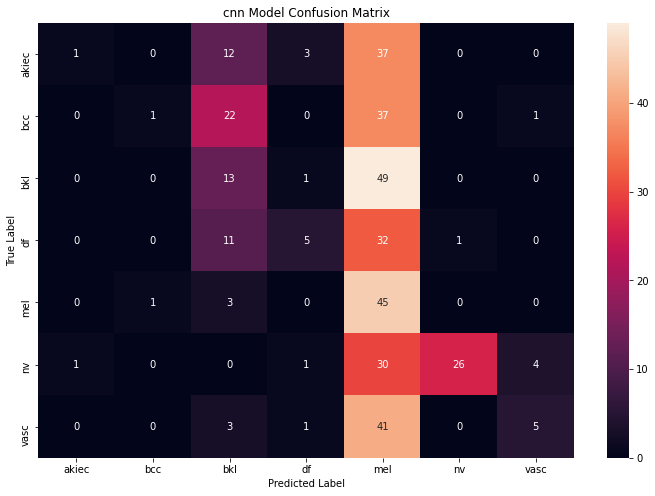

In [ ]:
plot_cm('cnn', cnn_cm)

It looks like our custom CNN's performance is better than the Logistic Regression, KNN, and Decision Tree models. More training epochs or a bigger dataset would probably help with the performance.

Try building your own CNN! Let's see who can get the best performance in your group!

In [ ]:
#@title Define Your Model Here { display-mode: "form" }
def CNNClassifier_Modified(epochs=10, batch_size=10, layers=5, dropout=0.5, activation='relu'):
  def set_params():
    i = 1  
  def create_model():
    model = Sequential()
    model.add(Reshape((IMG_WIDTH, IMG_HEIGHT, 3)))
    
    # Your Code Here

    model.add(Dense(7))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=[tf.keras.metrics.AUC()])
    return model
  return KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=1)

In [ ]:
#@title Train Your Model Here { display-mode: "form" }
cnn = CNNClassifier()

cnn.fit(X_train.astype(np.float32), y_train_onehot.astype(np.float32),
        validation_data=(X_test.astype(np.float32),y_test_onehot.astype(np.float32))
        ,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


116/116 [==============================] - 20s 135ms/step - loss: 8.3698 - auc_1: 0.5209 - val_loss: 1.7018 - val_auc_1: 0.6078


In [ ]:
#@title Evaluate Your Model's Performance Here { display-mode: "form" }
y_pred = cnn.predict(X_test)
y_pred_proba = cnn.predict_proba(X_test)
cnn_cm = model_stats("CNN",y_test,y_pred,y_pred_proba)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


39/39 [==============================] - 1s 27ms/step
CNN
The accuracy of the model is 0.33333
The ROC AUC Score of the model is 0.74499


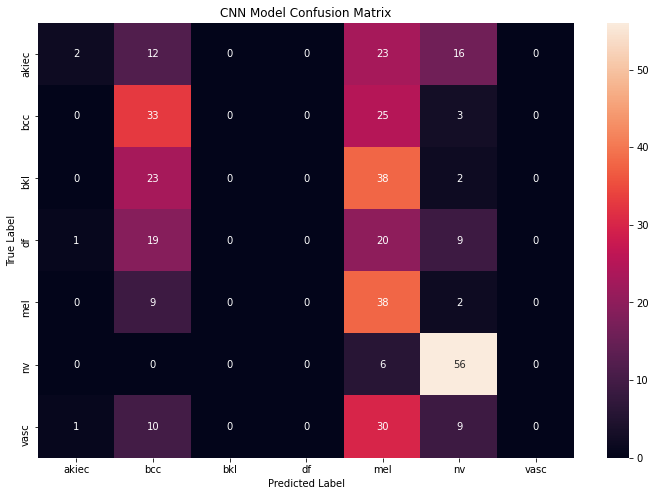

In [ ]:
#@title Plot the Confusion Matrix Here { display-mode: "form" }
plot_cm("CNN", cnn_cm)

Let's try using a grid search with our CNN. A note to instructors, this section may take a long time to execute so it's better if students come back to this portion on their own time.

In the variable `param_grid` we can specify which parameters in our CNN we want to modify.

In [ ]:
param_grid = {
              'epochs' :              [10, 20, 30],
              'batch_size' :          [32, 64,128],
              'layers' :              [1, 3, 5],
              'dropout' :             [0.2, 0.3, 0.5],
              'activation' :          ['relu', 'elu']
             }

With this parameter grid we would be training 162 different models! This is because the total number of hyperparameter combinations is calculated as `3 * 3 * 3 * 3 * 2`. For testing out our grid search, let's redefine our parameter grid to just have four possible comibnations.



In [ ]:
# Your Code Here

Let's create a validation slice in our dataset.

In [ ]:
X_test_small, X_val, y_test_small, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

Here we've created a class for our Grid Search Classifier that can be used by the hypopt library for generating various models with different hyperparameters.

In [ ]:
#@title Run this to Define our Grid Search CNN Class { display-mode: "form" }
class gridSearchCNN():
    
    keras_model = None
    model = Sequential()
    #epochs=10
    epochs=1
    batch_size=10
    layers=5
    dropout=0.5
    activation='relu'
    
    def __init__(self, **params):
      pass
  
    def fit(self, X, y, sample_weight = None):
        print("fitting")
        self.keras_model.fit(X,y)
        print("fitted")
        return self.keras_model
    def predict(self, X):
        return self.keras_model.predict(X)
    def predict_proba(self, X):
        return self.keras_model.predict_proba(X)
    def score(self, X, y, sample_weight = None):
        print("scoring")
        #return self.keras_model.score(X,y)
        y_pred_proba = self.keras_model.predict_proba(X)
        roc_auc_score_val = roc_auc_score(y, y_pred_proba)
        print("scored")
        return roc_auc_score_val
                
    
    def createKerasCNN(self,):
      
      def create_model():
        self.model = Sequential() 
        self.model.add(Reshape((IMG_WIDTH, IMG_HEIGHT, 3)))
        
        for i in range(self.layers):
          self.model.add(Conv2D(64, (3, 3), padding='same'))
          self.model.add(Activation(self.activation))
        
        self.model.add(Conv2D(64, (3, 3)))
        self.model.add(Activation(self.activation))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(self.dropout / 2.0))

        self.model.add(Conv2D(128, (3, 3), padding='same'))
        self.model.add(Activation(self.activation))
        self.model.add(Conv2D(128, (3, 3)))
        self.model.add(Activation(self.activation))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(self.dropout / 2.0))

        self.model.add(Flatten())
        self.model.add(Dense(512))
        self.model.add(Activation(self.activation))
        self.model.add(Dropout(self.dropout))
        self.model.add(Dense(7))
        self.model.add(Activation('softmax'))

        # initiate RMSprop optimizer
        opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

        # Let's train the model using RMSprop
        self.model.compile(loss='categorical_crossentropy',
                      optimizer=opt,
                      metrics=[tf.keras.metrics.AUC()])
        return self.model

      return KerasClassifier(build_fn=create_model, epochs=self.epochs, 
                            batch_size=self.batch_size, verbose=2)

    def get_params(self, deep = True):
        return {
            'epochs': self.epochs,
            'batch_size': self.batch_size,
            'layers': self.layers,
            'dropout': self.dropout,
            'activation': self.activation
            }

    def set_params(self, **params):
      if 'epochs' in params.keys():
        self.epochs = params['epochs']
      if 'batch_size' in params.keys():
        self.batch_size = params['batch_size']
      if 'layers' in params.keys():
        self.layers = params['layers']
      if 'dropout' in params.keys():
        self.dropout = params['dropout']
      if 'activation' in params.keys():
        self.activation = params['activation']
      
      self.keras_model = self.createKerasCNN()
      return self

Now let's implement our grid search to identify our optimal model parameters.

**Note:** This may take very long to run, so it might be a good idea to come back to this later.

In [ ]:
gs = GridSearch(model=gridSearchCNN(),param_grid=param_grid,parallelize=False)

In [ ]:
# Your Code Here

In [ ]:
y_train_onehot = np.zeros((y_train.size, y_train.max().astype(int)+1))
y_train_onehot[np.arange(y_train.size),y_train.astype(int)] = 1

y_val_onehot = np.zeros((y_val.size, y_val.max().astype(int)+1))
y_val_onehot[np.arange(y_val.size),y_val.astype(int)] = 1

Let's evaluate our model with our testing dataset.

In [ ]:
gs.fit(X_train.astype(np.float32), y_train_onehot.astype(np.float32),
      X_val.astype(np.float32), y_val_onehot.astype(np.float32),verbose=1)

Let's also plot the confusion matrix.

In [ ]:
y_pred = gs.predict(X_test_small)
y_pred_proba = gs.predict_proba(X_test_small)
gs_cm = model_stats("Grid Search CNN",y_test_small,y_pred,y_pred_proba)

#Transfer Learning

Now, let's try implementing *transfer learning.* This a form of machine learning where we take an existing pre-trained network and modify the weights for the top level neurons by training on our dataset. Here, we'll use the MobileNet model as a basis for our model.

In [ ]:
def transfer_learning_model():
  mobilenet_model = MobileNet(input_shape=(IMG_HEIGHT,IMG_WIDTH,3), include_top=False, pooling="max")

  transfer_model = Sequential()
  transfer_model.add(mobilenet_model)
  transfer_model.add(Dropout(0.1))
  transfer_model.add(BatchNormalization())
  transfer_model.add(Dense(256, activation="relu"))
  transfer_model.add(Dropout(0.1))
  transfer_model.add(BatchNormalization())
  transfer_model.add(Dense(7, activation="softmax"))

  # initiate RMSprop optimizer
  opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

  # Let's train the model using RMSprop
  transfer_model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=[tf.keras.metrics.AUC()])

  return transfer_model

We no longer need the validation dataset as we aren't tweaking any hyperparameters anymore, so we can use our original, bigger `X_test` dataset that includes the validation data.

Let's confirm that our training and testing variables are the right shapes. Once again, we'll use the one-hot encoded variables for the output: `y_test_roc` and `y_train_roc`.

Now, let's train our transfer learning model

In [ ]:
transfer_model = KerasClassifier(build_fn=transfer_learning_model, verbose=1,epochs=1)

In [ ]:
# Your Code Here
transfer_model.fit(X_train.astype(np.float32), y_train_onehot.astype(np.float32),
       validation_data=(X_test.astype(np.float32),y_test_onehot.astype(np.float32))
       ,verbose=1)
# XTRAIN yTRAIN testing data and validation is test data and its gonna see how well its learning

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


37/37 [==============================] - 17s 170ms/step - loss: 2.0726 - auc_5: 0.6167 - val_loss: 3.2474 - val_auc_5: 0.6979


Let's observe its performance:

Let's take a look at the confusion matrix

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


13/13 [==============================] - 0s 14ms/step
Transfer_Model
The accuracy of the model is 0.24806
The ROC AUC Score of the model is 0.69011


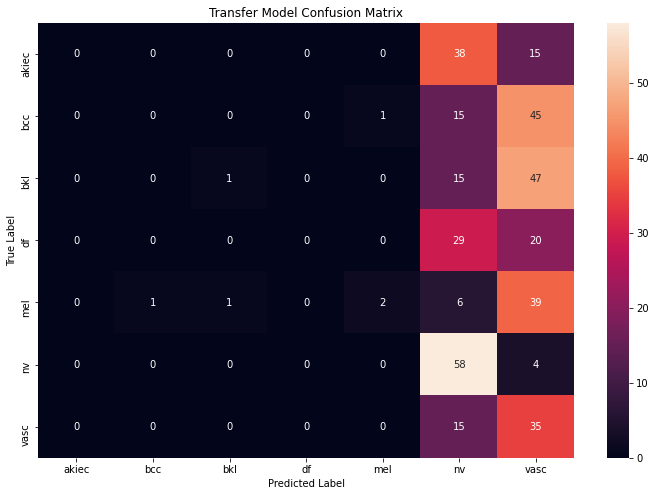

In [ ]:
# Your Code Here
y_pred = transfer_model.predict(X_test)
y_pred_proba = transfer_model.predict_proba(X_test)
transfer_model_cm = model_stats("Transfer_Model",y_test,y_pred,y_pred_proba)
plot_cm("Transfer", transfer_model_cm)

Great, looks like this model performed the best! **Question:** Why would that be? 

In [ ]:
# Your Response Here

Now that we've created our model, let's save it to a file we can load up later.

In [ ]:
tfjs.converters.save_keras_model(transfer_model.model, 'transfer_model')

Now, the model should be saved to your computer through your browser. Unfortunately, tensorflowjs doesn't support this version of MobileNet, so we'll have to use our first CNN model for the website deployment.

Great work! We've just developed various ML models to perform classification on our skin lesion dataset! Now, our next step is to package this model into a mobile application.

# Deploy ML to a Website

Now, let's start thinking about building a mobile app or web app to perform skin cancer diagnosis. Take a few moments to think about your app:
*   Who would the users be?
*   What would be the advantages and disadvantages of using your app vs. consulting a medical professional? Are there any risks associated with your app?
*   What tools would you need to build your app?
*   What would your user interface look like?


In [ ]:
# Your Response Here

Now, we'll use JavaScript and HTML to construct a simple website that hosts your website, which you can access from your browser. The following code segment provides the public URL from which you can access your website.

In [ ]:
print(eval_js("google.colab.kernel.proxyPort(8000)"))

https://vaazs6tbzer-496ff2e9c6d22116-8000-colab.googleusercontent.com/


Whenever you want to host the website, run the code segment below and click on the URL above to check it out. 

It's important to note that the HTML and JS won't execute in the Colab code cells, but once you host the website, you can head over to the URL to check out your code in action! For debugging purposes, you can right click on the webpage, choose "Inspect Element", and select "Console" to follow your Javascript.

In [ ]:
!python -m http.server 8000

Serving HTTP on 0.0.0.0 port 8000 (http://0.0.0.0:8000/) ...


Now, let's build our website. Through this website, we'll be able to run our CNN model in the browser using Tensorflow JS. As TensorflowJS doesn't yet support the version of Mobilenet we use in this notebook, we'll be using our first CNN.

In this project, we'll be working with HTML, CSS, and Javascript to build our website:

*   With HTML we can define and manipulate UI elements like text fields, buttons, and loading bars. 
*   With CSS, we can craft the feel of the elements and manipulate attributes of the design, such as color or animations.
*   With Javascript (JS), we can add logic to our website and write code like we're used to.

In a new tab, navigate to [this website.](https://www.w3schools.com/tryit/tryit.asp?filename=tryhtml_default) We'll be editing our HTML UI here before actually deploying our website. Copy over the code below, which we'll use as a skeleton.

**Question:** What are some pros and cons of using web development frameworks to build a web app for skin cancer diagnosis? What would some alternatives be?

In [ ]:
# Your Response Here

## Basics of HTML and CSS

HTML elements are defined through tags(`<tag>`). An element's opening tag has no backslash, while its closing tag has one (like `</tag>`). Everything between the tags is considered to be a part of the element. In HTML we can define comments through the `<!-- -->` tag.

In [ ]:
<!-- HTML allows us to create UI elements we can interact with-->

<head>

</head>
<body>
  
</body>

Copy the following lines into the space between the head tags. The link tag allows us to import CSS libraries. In this case, we'll be using the Materialize library, which mimics Google's Material Design design language. The line with the `<meta>` tag tells our browser that our website is optimized for mobile devices.

In [ ]:
<!-- CSS helps us design the feel and style of the UI. In this example, we're using Google's Material Design-->

<!-- Import Google Icon Font -->
<link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet">

<!--Optimize Viewport for Mobile Devices-->
<meta name="viewport" content="width=device-width, initial-scale=1.0"/>

We'll also need to import a CSS stylesheet for Materialize from [this](https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css) link. Can you figure out how to import a stylesheet?

In [ ]:
# Your Code Here

You can look into other design languages to see which ones you like!

In [ ]:
# Your Response Here

## UI Elements

Now, we'll define some other UI elements. The following elements will be placed in the `body` element. The nav tag specifies a title bar. In the nav tag, you can also select your color by specifying it in the class attribute. [Here](https://materializecss.com/color.html) is a list of materialize colors. The div tag just specifies a section of HTML that can be extensively customized. For example, here the div tag is an element of the Title Bar. In a later example, div tags will be components of loading bars and file input buttons.

In [ ]:
<!-- Title Bar -->
<nav class="{Enter Your Color Here}">
    <div class="nav-wrapper">
      <a href="#" class="brand-logo">Skin Cancer Diagnosis</a>
    </div>
  </nav>

SyntaxError: ignored

The following tag specifies a type of UI element container. Every HTML element in a `<div>` tag will experience the properties of the `<div>` tag. For example, this div has a padding of 5%, meaning that all elements inside of it, will have a 5% gap between the borders of the window.

In [ ]:
<!-- Container for all other HTML Elements -->
<div style="padding:5%;">

</div>

SyntaxError: ignored

The following HTML represents a loading bar. This loading bar will stop progressing once we load our model.

In [ ]:
<!-- Loading Bar --> 
<h4 id="loadingmodel">Loading ML Model</h4>
<div id="progressbar" class="progress">
    <div class="indeterminate"></div>
</div>

The following HTML represents a file input button. We will be using this to read images to classify. You can also set your color here.

In [ ]:
<!-- Image File Input -->
<div class="file-field input-field">
    <div class="btn {Enter Your Color Here}">
      <span>Select Image</span>
      <input type="file" accept="image/*" onchange="onFileSelected(event)">
    </div>
    <div class="file-path-wrapper">
      <input class="file-path validate" type="text">
    </div>
  </div>

The following HTML represents an image. We will be using this to display the image that the user inputs.

In [ ]:
<!-- Image to be Classified -->
<img id="image"></img>

Now add width and height attributes to the `<img>` tag that correspond to the width and height of our images.

In [ ]:
# Your Code Here

The following HTML represents the creation of new lines. This is just for formatting.

In [ ]:
<!-- Add New Lines -->
<br/>
<br/>

The following HTML represents the button we'll use to trigger the image classification. You can also select a button color here. The options for button size are `btn-small` or `btn-large`.  

In [ ]:
<!-- Button to Perform Classification -->
<a onclick="predict()" class="{Enter Your Color Here} {Enter Your Button Size Here} waves-effect waves-light btn">Classify Image</a>

You can also add an icon to the button. You can find a list of icons at [this](https://materializecss.com/icons.html) link. By adding an icon tag `<i class="left material-icons">add</i>` to the inside of a button's tag, the icon should display alognside the button text. An example is in the line below.

In [ ]:
<!-- Button to Perform Classification -->
<a onclick="predict()" class="{Enter Your Color Here} {Enter Your Button Size Here} waves-effect waves-light btn"><i class="left material-icons">add_alert</i>Classify Image</a>

The following HTML represents the text we'll use to display the probability and prediction of our image classification model.

In [ ]:
<!-- Text Fields for the Prediction -->
<h3>Prediction</h3>
<b><p id="prediction"></p></b>

Now, add a `<p>` tag for the classification's probability as well.

In [ ]:
# Your Code Here

## Writing your Web App

Now go ahead and place these elements however you would like in your website! Feel free to customize your UI to bring a personal touch to your web app!

Some other handy Materialize Helper classes can be found [here](https://materializecss.com/helpers.html).

Once you finish writing your code, paste it into the code cell below and run the cell, to save your HTML/CSS/JS to Colab.

In [ ]:
%%writefile index.html
<!-- Demo: https://rganesh22.github.io/htmlmockups/tensorflowjs.html -->
<!-- HTML allows us to create UI elements we can interact with-->

<head>
    <!-- CSS helps us design the feel and style of the UI. In this example, we're using Google's Material Design-->
    <!-- Your CSS Libraries -->
</head>
<body>
    <!-- Your HTML UI Elements -->
        
    <!-- Import JS Libraries -->
    <script src="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/js/materialize.min.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs@2.0.0/dist/tf.min.js"></script>
    <script src="static/js/skin_cancer_diagnosis_script.js"></script>

    <!-- Javascript allows us to apply logic to our UI elements and programmatically control the website -->
    <!-- We'll be using Tensorflow JS to perform our model inference -->

    <script>       
        // Initialize our HTML elements as JS objects    
    </script>
</body>

## Writing JavaScript (JS)

The script tag specifies the location to import javascript libraries from. In this case, we're importing Tensoflow  JS for ML and the Materialize JS library. Place this in the body, but after the div our elements are placed in.

In [ ]:
<!-- Import JS Libraries -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/js/materialize.min.js"></script>
<script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs@2.0.0/dist/tf.min.js"></script>

Now define a script element. This is where we will be able to write our Javascript. Add this element below our JS imports.

In [ ]:
<!-- Javascript allows us to apply logic to our UI elements and programmatically control the website -->
<!-- We'll be using Tensorflow JS to perform our model inference -->
<script>

</script>

Now how might we reference all of these HTML elements in Javascript? Are there any attributes of these elements you notice that may help us out?

In [ ]:
# Your Response Here

First, we need to initialize our HTML elements in JS so that we can reference them through variables. The following line references each HTML element by its specified ID and creates its respective variable in JS. In JS, we have to declare variables with the `var` identifier, unlike Python. Additionally, in Javascript we declare comments with `//` as opposed to `#`. An example is below.

In [ ]:
// Initialize our HTML elements as JS objects
var imgtag = document.getElementById("image")

Now initalize all of our other HTML elements that have a specified ID. Ensure that that the variable names below stay the same, but the ID passed is specific to your code.

In [ ]:
<script>
    
    // Initialize our HTML elements as JS objects

    var imgtag = document.getElementById("{YOUR INPUT <img> TAG}")
    var prediction_text = document.getElementById("{YOUR PREDICTION <p> TAG}")
    var probability_text = document.getElementById("{YOUR PROBABILITY <p> TAG}")

    var progressbar = document.getElementById("{YOUR PROGRESS BAR <div> TAG}")
    var loadingmodel = document.getElementById("{YOUR PROGRESS BAR TEXT <h4> TAG}")
    
</script>

Great job! Now you should be able to view your website!

**Some questions to consider:**
*   Given what you know about your model, what's the best-case scenario from someone using your web app? What's the worst case?
*   What legal and ethical challenges might you need to consider in deploying your web app?
*   How could systems like this be used to support medical professionals rather than replacing them?

## Optional Exploration and Next Steps

We've also included a script that runs your `tensorflow.js` model on the input image and returns the prediction to the webpage. If you're interested in viewing this code (written in JS), you can view the file at the path `static/js/skin_cancer_diagnosis_script.js` in the Colab filesystem.

**Challenge:** If you have taken a look at the JS script, consider by which method the image is sent from the front-end to the back-end. Are there alternate methods to do this? Look into cloud services like Google Cloud or the REST API for more ideas.

Additionally, what UI elements do we use to read the user's data and return a diagnosis? Are there any alternative methods of going about constructing this interface? Take a look at the Materialize documentation to see what UI elements you can use. You may need to edit the script as well, depending on how you've created your UI.

Some possible overall next steps with the web app:
*   Add text fields to read the user's name and return a personalized message upon diagnosis
*   Use checkboxes and other UI elements to create a "terms of service" message and only allow users who accept it to be diagnosed
*   Use a different CSS library to change the design of the web app
*   Look into reading from and storing images in the cloud through tools like Firebase
*   Package this source code using tools like Cordova to create a mobile app!



# Hosting Websites for Longer Periods of Time

If you would like to host the website perpetually, you will have to use a web hosting service. There are multiple ways to go about doing this. You can use a service like Github Pages, Amazon Web Services, or the Google Cloud. An alternative option is to use Node.js with frameworks such as Electron or Cordova, to deploy our website as a native application on Windows, Mac, Linux, Android, or iOS.

If you're using Github Pages, you can initialize a repository and navigate to the setings page. There, you can set up your Github Pages settings and host your website online. Your website is accessible to anyone on the Internet, and you wouldn't need to work with any Colab notebooks!